# 이상치 정제
1. 결측치 정제를 우선적으로 수행하고 나서 이상치를 정제해야함
1. 이상치 찾기
    - 상자그림을 통해 이상치가 존재하는 변수를 찾는다
    - 이상치가 발견된 경우 해당 변수의 극단치 경계값을 계산
2. 이상치를 결측치로 변경
3. 결측치 정제 방법 적용

## #01. 작업준비

### 패키지 가져오기 

scikit-learn 패키지 설치 필요


In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt
import sys
import os 

In [2]:
# helper.py 파일이 존재하는 폴더 위치를 파이썬 라이브러리 경로에 추가
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))


### 데이터 가져오기


In [3]:
df = pd.read_excel("https://data.hossam.kr/D03/ref_sample.xlsx", index_col="이름")

df.head()

,국어,영어,수학,과학
이름,,,,
철수,98.0,77,88.0,64.0
영희,88.0,120,62.0,72.0
민철,NaN,70,83.0,79.0
수현,63.0,60,31.0,71.0
호영,75.0,50,90.0,NaN


## #02. 결측치 정제하기 


In [11]:
from helper import replaceMissingValue , replaceOutlier

In [12]:
re_df = replaceMissingValue(df)
re_df

,국어,영어,수학,과학
이름,,,,
철수,98.000,77.0,88.000,64.000000
영희,88.000,120.0,62.000,72.000000
민철,83.375,70.0,83.000,79.000000
수현,63.000,60.0,31.000,71.000000
호영,75.000,50.0,90.000,75.428571
영호,80.000,88.0,91.000,72.000000
용식,82.000,88.0,76.875,90.000000
나영,90.000,92.0,81.000,75.428571
석영,91.000,90.0,89.000,80.000000


### 그래프 기본 설정

In [13]:

# 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'   # 윈도우 전용
#plt.rcParams['font.family'] = 'AppleGothic'    # 맥 전용
plt.rcParams["font.size"] = 10

# 그래프 크기 설정
plt.rcParams["figure.figsize"] = (12,8)

# 유니코드에서 음수 부호설정
plt.rcParams['axes.unicode_minus'] = False

### 상자그림

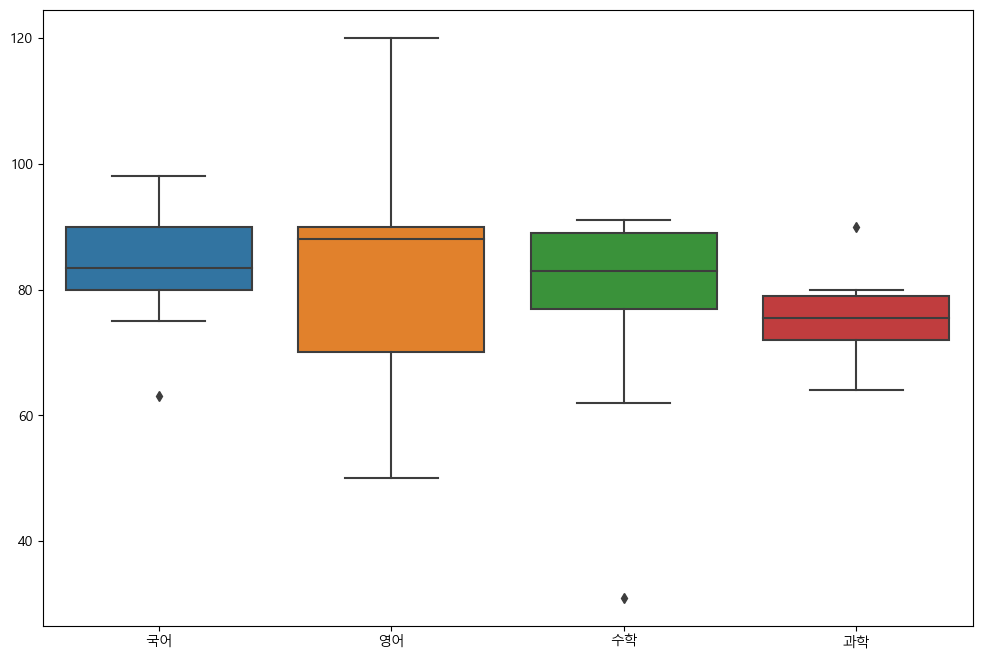

In [14]:
plt.figure()
sb.boxplot(data=re_df)
plt.show()
plt.close()

#### 찾아낸 이상치
1. 상자그림을 통해 검출된 국어 수학 과학점수
2. 분석가의 주관에 따른 영어점수

#### 이상치를 결측치로 변경

In [16]:
re_df = replaceOutlier(re_df,['국어','수학','과학'])
re_df

,국어,영어,수학,과학
이름,,,,
철수,98.000,77.0,88.000,NaN
영희,88.000,120.0,NaN,72.000000
민철,83.375,70.0,83.000,79.000000
수현,NaN,60.0,NaN,71.000000
호영,75.000,50.0,90.000,75.428571
영호,80.000,88.0,91.000,72.000000
용식,82.000,88.0,76.875,NaN
나영,90.000,92.0,81.000,75.428571
석영,91.000,90.0,89.000,80.000000


#### 영어 점수 처리

분석가 주관에 따른 이상치 선정결과 (100점이 넘는 성적을 결측치로)


In [18]:
re_df.loc[re_df['영어']>100 ,"영어"] = np.nan
re_df

,국어,영어,수학,과학
이름,,,,
철수,98.000,77.0,88.000,NaN
영희,88.000,NaN,NaN,72.000000
민철,83.375,70.0,83.000,79.000000
수현,NaN,60.0,NaN,71.000000
호영,75.000,50.0,90.000,75.428571
영호,80.000,88.0,91.000,72.000000
용식,82.000,88.0,76.875,NaN
나영,90.000,92.0,81.000,75.428571
석영,91.000,90.0,89.000,80.000000


#### 변경된 결측치에 대한 처리 

In [19]:
## 평균으로 대체 

final_df = replaceMissingValue(re_df)
final_df

,국어,영어,수학,과학
이름,,,,
철수,98.000000,77.000,88.000000,74.979592
영희,88.000000,76.875,85.553571,72.000000
민철,83.375000,70.000,83.000000,79.000000
수현,85.921875,60.000,85.553571,71.000000
호영,75.000000,50.000,90.000000,75.428571
영호,80.000000,88.000,91.000000,72.000000
용식,82.000000,88.000,76.875000,74.979592
나영,90.000000,92.000,81.000000,75.428571
석영,91.000000,90.000,89.000000,80.000000
